In [1]:
import numpy as np
import PIL as p
from PIL import ImageOps
import os
from matplotlib import pyplot as plt

In [15]:
lista_arrim = []
lista_arrta = []
for n_archivo in os.listdir('database'):
    if n_archivo.endswith('.png'):
        target = n_archivo[7:-4].strip('-')
        imagen = p.Image.open('./database/' + n_archivo)
        imagen = ImageOps.autocontrast(imagen, cutoff=(0.1,80), ignore=1)
        imagen = ImageOps.invert(imagen)
        arrim = np.asarray(imagen)
        arrim = np.reshape(arrim, (1, 784))
        lista_arrim.append(arrim)
        lista_arrta.append(target)


arrim_concat = np.concatenate(lista_arrim, axis=0)
#plt.imshow(lista_arrim[0], cmap='gray')
lista_arrim[0].shape

(1, 784)

In [17]:
np.savetxt('imagen_manual.csv', arrim_concat, delimiter=',', fmt='%s')
np.savetxt('target_manual.csv', lista_arrta, delimiter=',', fmt='%s')

In [10]:
a = np.array([[0,1],[1,0]]).reshape((1,4))

print(a)

[[0 1 1 0]]


In [18]:
loaded_images = np.loadtxt('imagen_manual.csv', delimiter=',')
loaded_target = np.loadtxt('target_manual.csv', delimiter=',')

0.0


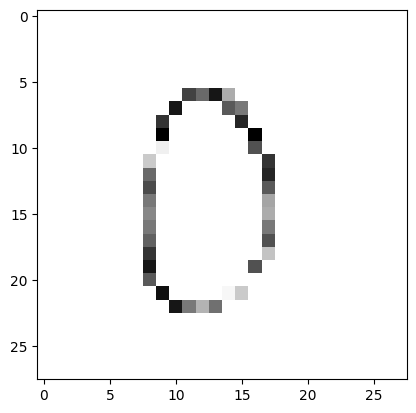

In [13]:
plt.imshow(loaded_images[0].reshape((28, 28)), cmap='gray_r')

print(loaded_target[0])

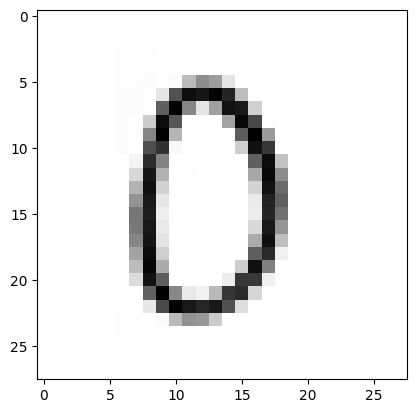

In [16]:
plt.imshow(lista_arrim[0].reshape((28, 28)), cmap='gray_r')

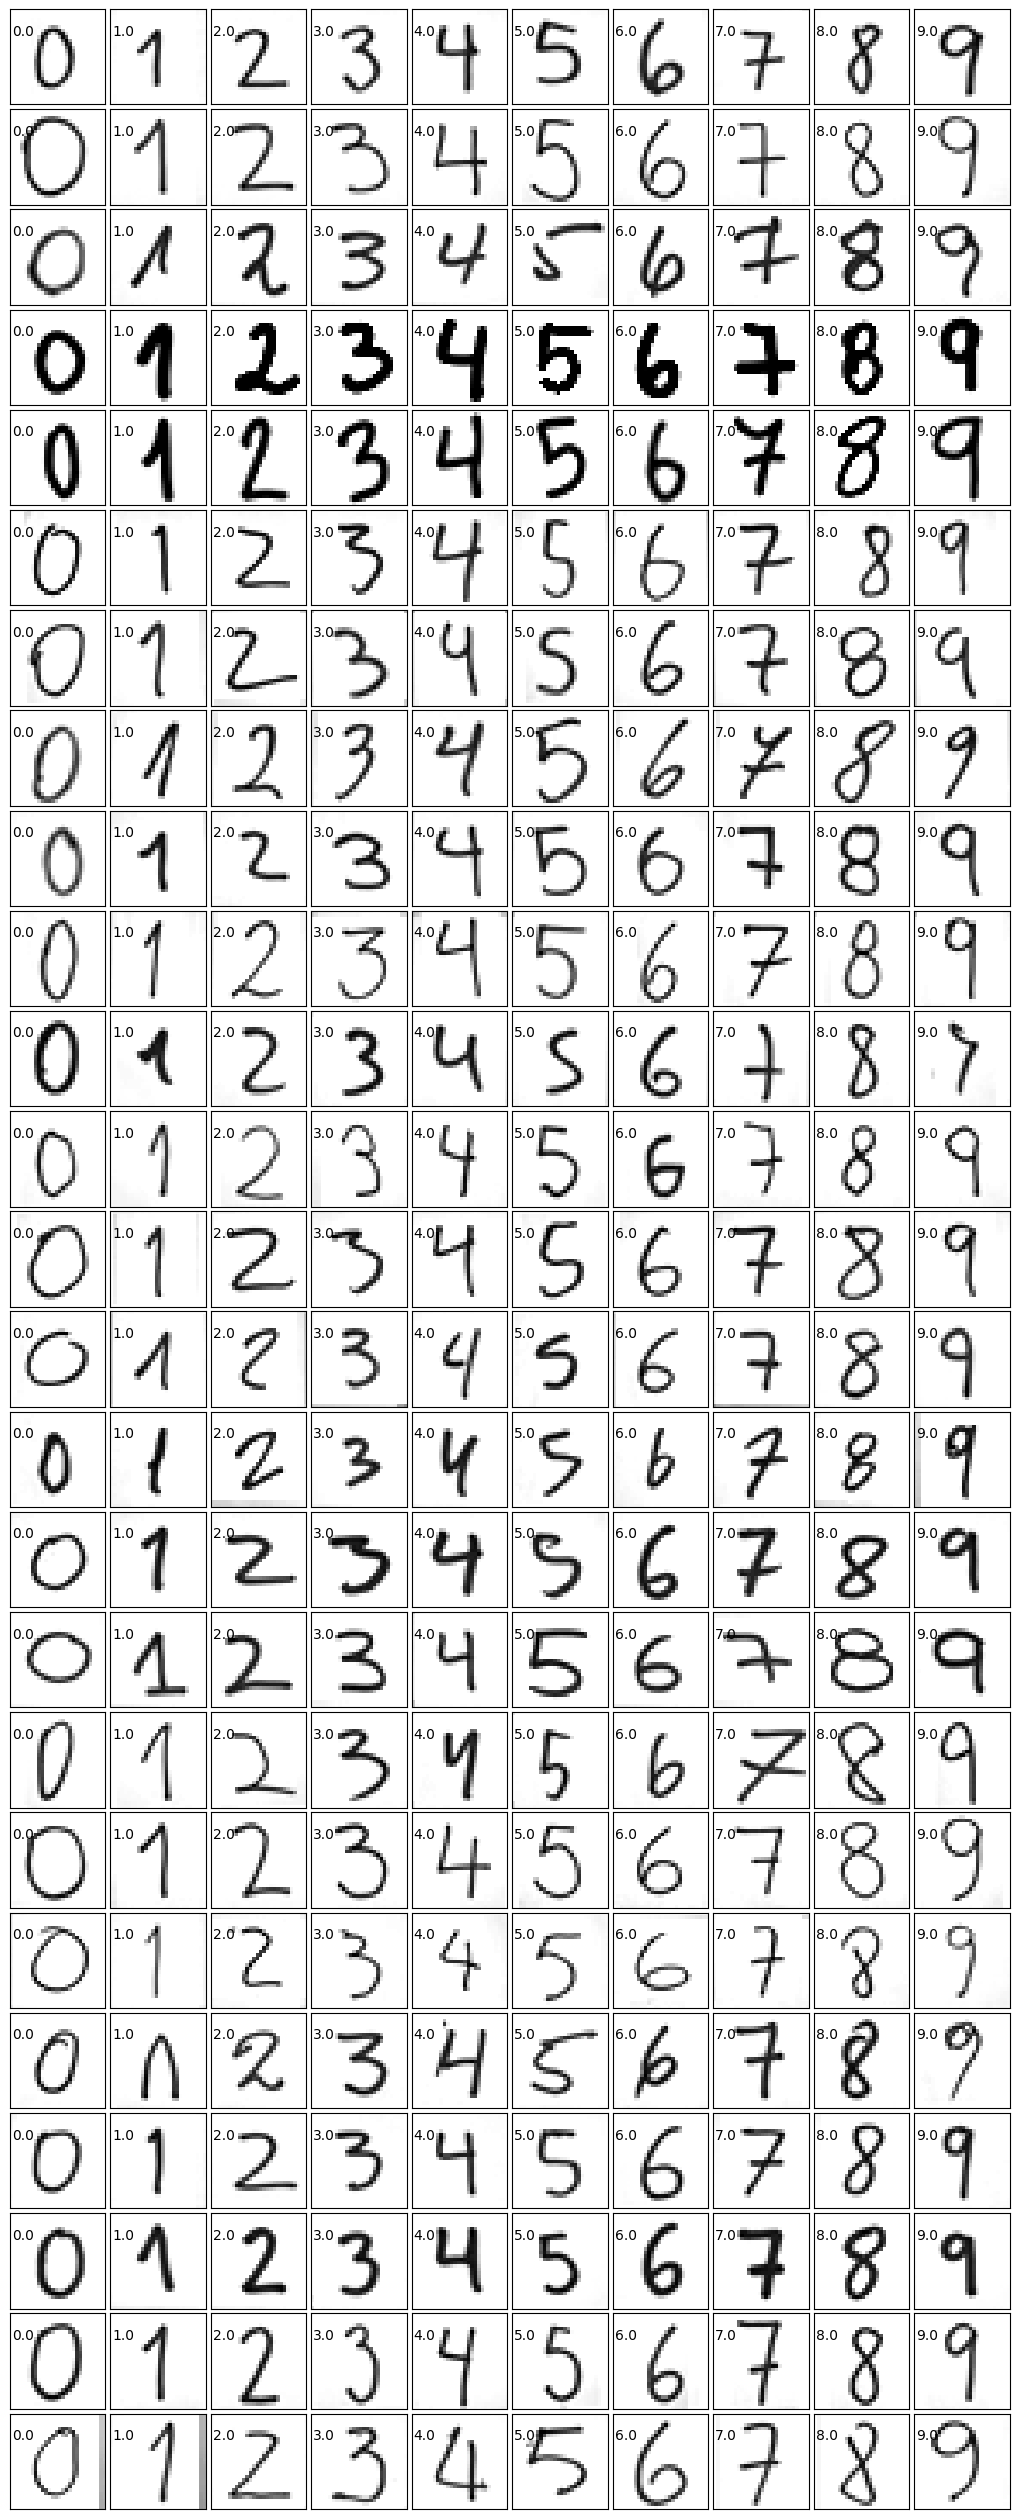

In [19]:
fig = plt.figure(figsize=(10, 25))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(250):
    ax = fig.add_subplot(25, 10, i + 1, xticks=[], yticks=[]) # grid for each number
    ax.imshow(loaded_images[i].reshape((28,28)), cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(loaded_target[i]))